######conda install -c pyviz hvplot
# Exploratory Data Analysis of Cardiovascular Disease
###### 2021 ©  Jeremy Ang Pin En, Sylvia Deborah, Weng Letian Don

# Chapter 1
## The Beginning
###1.1 Objective
The objective of this practice is to do an exploratory data analysis on cardiovascular disease and how it is related to any included variables.

The dataset used is resourced originally from Kaggle at https://www.kaggle.com/sulianova/cardiovascular-disease-dataset.

This coding report is organised as follows:
###Chapter 1: The Beginning
Includes the basic importing of python packages and basic data description as well as the dataset cleaning.

###Chapter 2: The Middle
Includes the data processing and visualization included.

###Chapter 3: The End
Includes what is the main point of the codes runthrough and the summary.


###1.2 Package Import

In [141]:
#@title Installing Hvplot
!pip install hvplot

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import hvplot.pandas
from scipy import stats
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sb.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from google.colab import files


Uploading the dataset:

In [143]:
uploaded = files.upload() #The dataset is already uploaded, please proceed to run the cells below and stop running this cell.

Saving dataset.csv to dataset (3).csv


Description/Information of Dataset

In [144]:
df = pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [145]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [146]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


###1.3 Data Cleaning (General)
Remove "id" column as it will not be used

In [147]:
df.drop('id',axis=1,inplace = True)

Converting age(in days) to age(years old)

In [148]:
df1 = pd.DataFrame((df["age"] /365).apply(np.floor))
df.insert(2, "Age",df1, True)

In [149]:
df

,age,gender,Age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,50.0,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,55.0,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,51.0,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,48.0,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,47.0,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,52.0,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,61.0,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,52.0,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,61.0,163,72.0,135,80,1,2,0,0,0,1


Labelling of variables

In [150]:
age =df['Age']
gender =df['gender']
height =df['height']
weight =df['weight']
ap_hi =df['ap_hi']
ap_lo =df['ap_lo']
cholesterol =df['cholesterol']
gluc =df['gluc']
smoke =df['smoke']
alco =df['alco']
active =df['active']
cardio =df['cardio']

###1.4 Data Cleaning (Technical)

Replacing the values for gender to more distinct values. (0 = female, 1 = male)

In [151]:
df.describe()

,age,gender,Age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,52.840671,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,6.766774,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,29.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,48.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,53.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,58.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,64.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
gender = gender -1 # 0 = female, 1 = male, initally 1 = female, 2 = male

In [153]:
gender 

0        1
1        0
2        0
3        1
4        0
        ..
69995    1
69996    0
69997    1
69998    0
69999    0
Name: gender, Length: 70000, dtype: int64

Check for any missing values in any column in dataset

In [154]:
df.isna().sum()

age            0
gender         0
Age            0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Removing rows with negative blood pressures (invalid values)

Note : 
      
       ap_hi represents systolic blood pressure

       ap_lo represents diastolic blood pressure

In [155]:
indexap_hi = df[ df['ap_hi'] < 0 ].index
df.drop(indexap_hi , inplace=True)
indexap_lo = df[ df['ap_lo'] < 0 ].index
df.drop(indexap_lo , inplace=True)

Remove erroneous data in ap_hi and ap_lo that far exceeds the human threshold.

In [156]:
indexap_hi = df[ df['ap_hi'] < 60 ].index
df.drop(indexap_hi , inplace=True)
indexap_hi = df[ df['ap_hi'] > 200 ].index
df.drop(indexap_hi , inplace=True)

In [157]:
indexap_lo = df[ df['ap_lo'] < 50 ].index
df.drop(indexap_lo , inplace=True)
indexap_lo = df[ df['ap_lo'] > 140 ].index
df.drop(indexap_lo , inplace=True)

Identifying outliers for height values by quartiles using a boxplot

Text(0.5, 1.0, 'height')

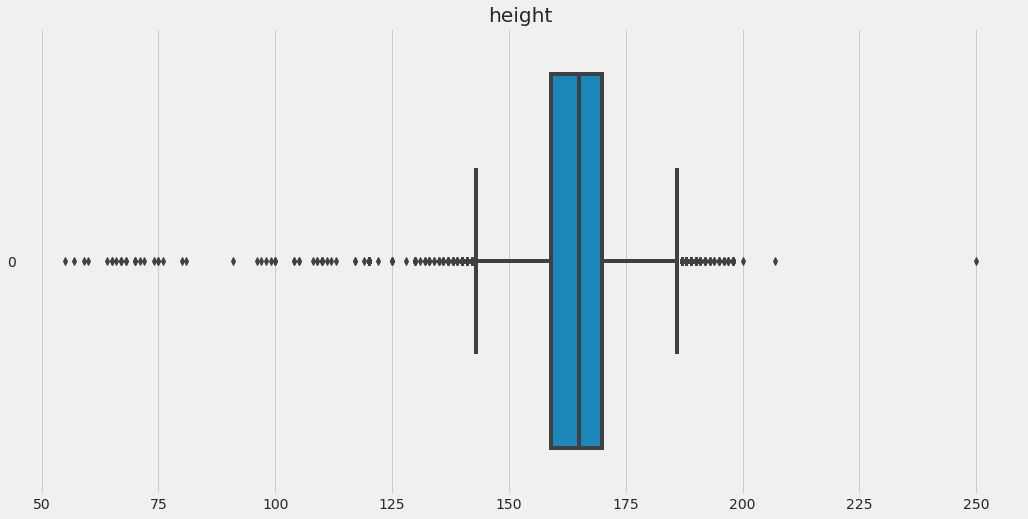

In [158]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = height, orient = "h").set_title('height')

Identifying the inter-quartile range for the boxplot for *height*

In [159]:
Q1h = height.quantile(0.25)
Q3h = height.quantile(0.75)
IQRh = Q3h - Q1h
outlierhl = Q1h - (1.5*IQRh)
outlierhh = Q3h + (1.5*IQRh)
print("Outliers exist outside the of range:",outlierhl," to ", outlierhh)

Outliers exist outside the of range: 142.5  to  186.5


In [160]:
outlierhl.dtype

dtype('float64')

Removing the outlier *height* values from *dataset* 

In [161]:
height = height.astype('float64')
indexheightl = df[ df['height'] < outlierhl ].index
df.drop(indexheightl , inplace=True)
indexheighth = df[ df['height'] > outlierhh ].index
df.drop(indexheighth , inplace=True)

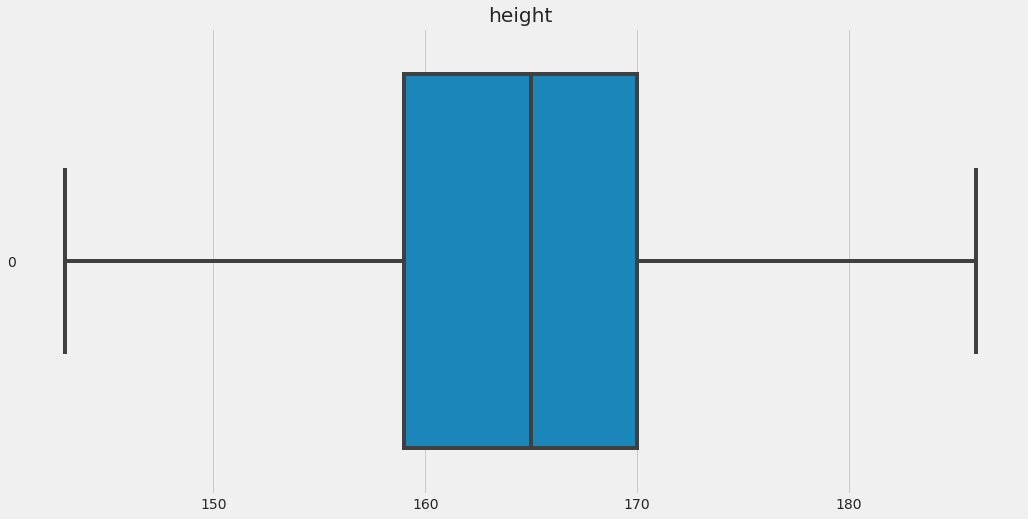

In [162]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = df['height'], orient = "h").set_title('height')
height =df['height']

Identifying outliers for weight values by quartiles using a boxplot

Text(0.5, 1.0, 'weight')

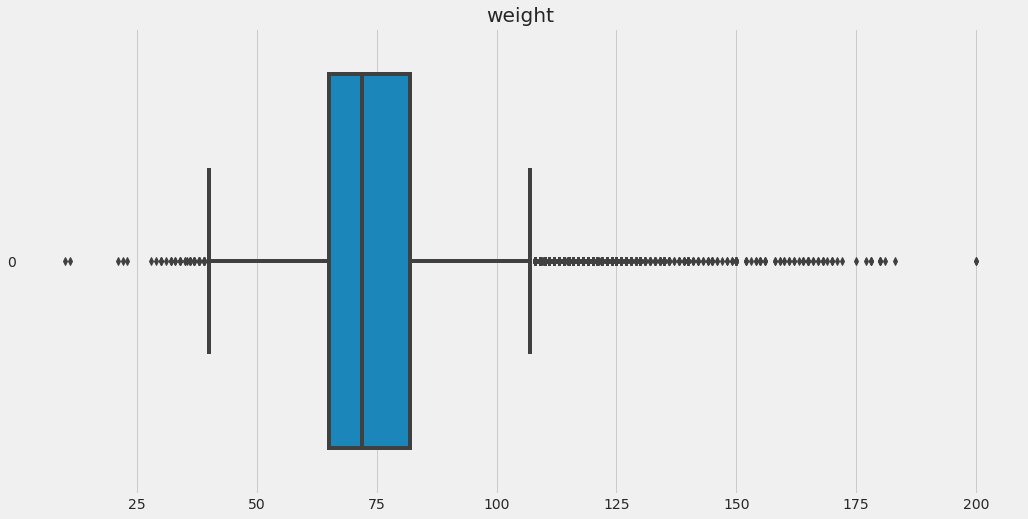

In [163]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = weight, orient = "h").set_title('weight')

Identifying the interquartile range for the boxplot for *weight*

In [164]:
Q1w = weight.quantile(0.25)
Q3w = weight.quantile(0.75)
IQRw = Q3w - Q1w
outlierwl = Q1w - (1.5*IQRw)
outlierwh = Q3w + (1.5*IQRw)
print("Outliers exist outside the of range:",outlierwl," to ", outlierwh)

Outliers exist outside the of range: 39.5  to  107.5


Removing the outlier *weight* values from the *dataset*

In [165]:
weight = weight.astype('float64')
indexweightl = df[ df['weight'] < outlierwl ].index
df.drop(indexweightl , inplace=True)
indexweighth = df[ df['weight'] > outlierwh ].index
df.drop(indexweighth , inplace=True)

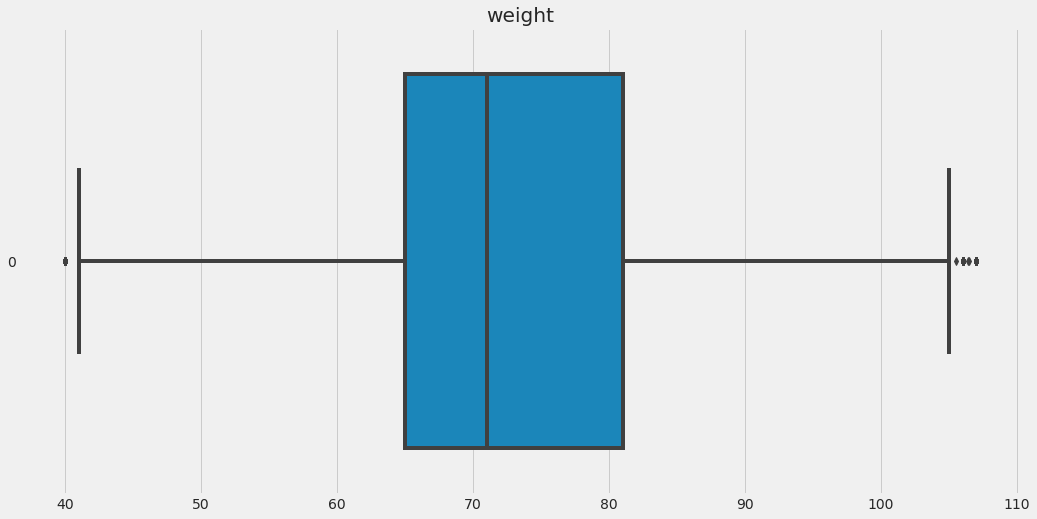

In [166]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = df['weight'], orient = "h").set_title('weight')
weight =df['weight']

With these steps, data cleamup is complete and we will move on to data visualization.

#Chapter 2
##The Middle
###2.1 Data Processing

Gender ratio of dataset ( 0 = female, 1 = male)

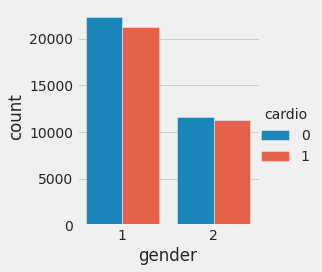

In [167]:
sb.catplot(x = "gender", data = df, kind = "count", height = 4,hue="cardio")

We notice that the gender ratio is not 1 to 1.

However, the proportion of male/female with cardiovascular disease is similar despite the gender ratio not being 1 to 1, thus it might not be of a concern.

Distribution of age in our dataset. 

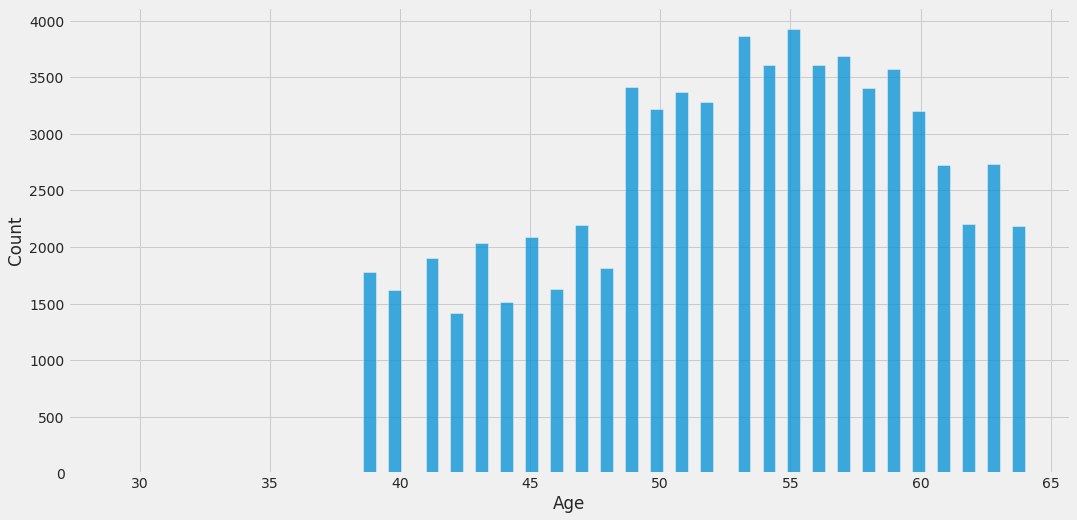

In [168]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = age)

There is a relative broad spectrum of dataset with age ranging from above 35 to below 65.

KDE density graph of ap_hi (systolic blood pressure)

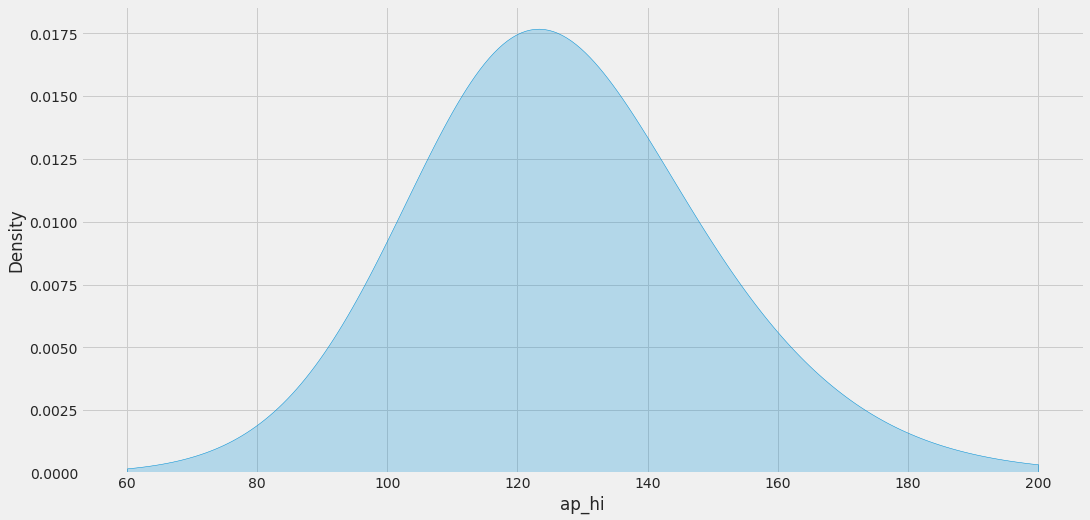

In [169]:
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = ap_hi,shade=True,cut =0, clip=(60,200))

KDE density graph of ap_lo (diastolic blood pressure)

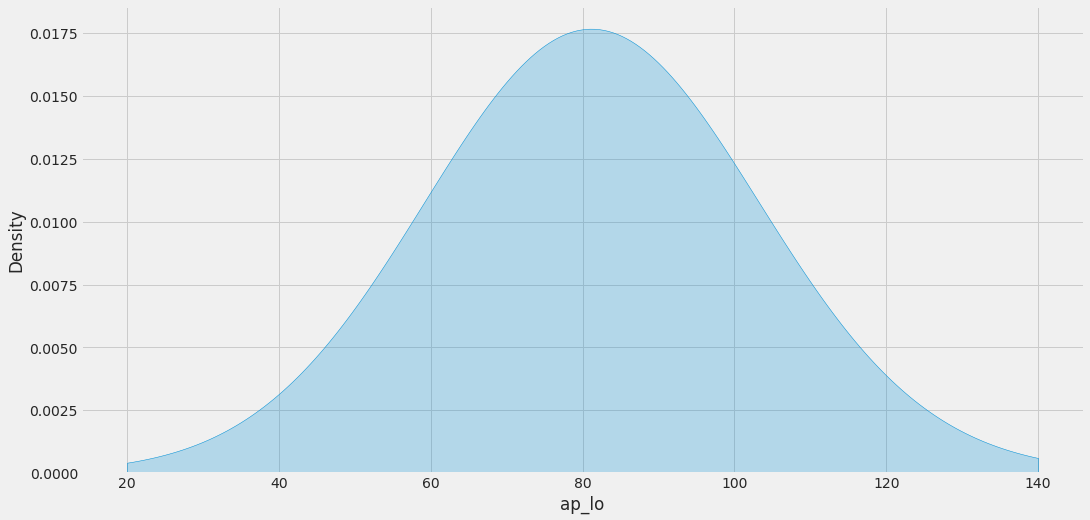

In [170]:
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = ap_lo,shade=True,cut =0, clip=(20,140))

Distribution chart of height of dataset



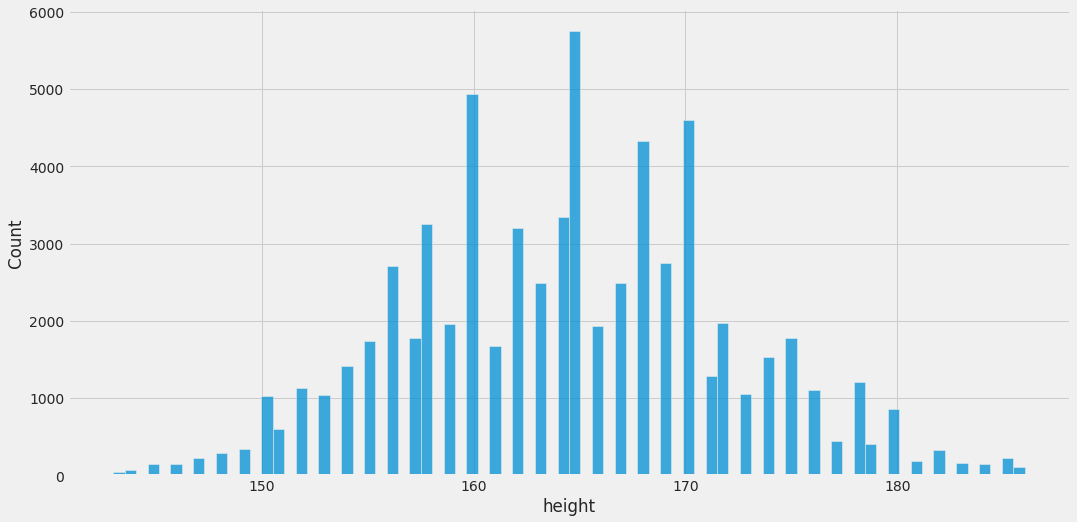

In [171]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = height)

Distribution chart of weight of dataset



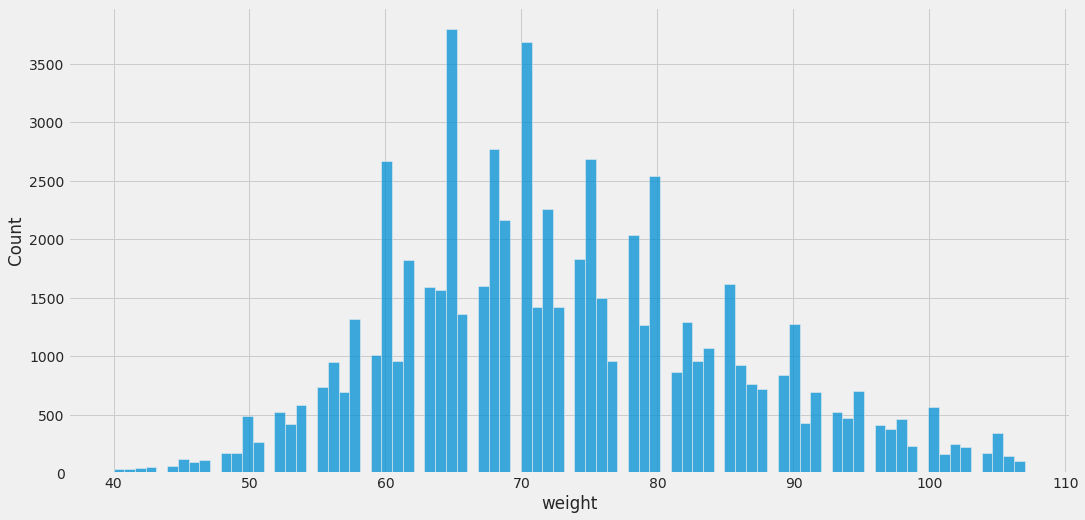

In [172]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = weight)

Graph comparing cholesterol level and presence/absence of cardiovascular disease

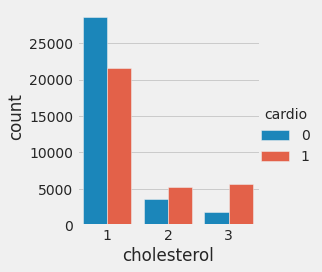

In [173]:
sb.catplot(x = "cholesterol", data = df, kind = "count", height = 4, hue = "cardio")

There is an increase in po

Graph comparing blood glucose level and presence/absence of cardiovascular disease

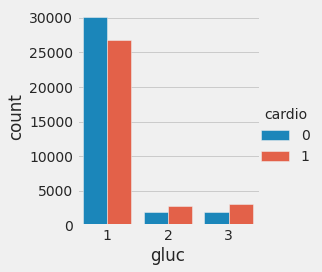

In [174]:
sb.catplot(x = "gluc", data = df, kind = "count", height = 4,hue="cardio")

Graph comparing smoking and presence/absence of cardiovascular disease

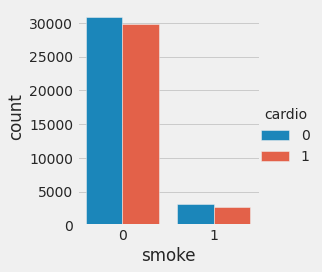

In [175]:
sb.catplot(x = "smoke", data = df, kind = "count", height = 4,hue="cardio")

Graph comparing consumption of alcohol and presence/absence of cardiovascular disease

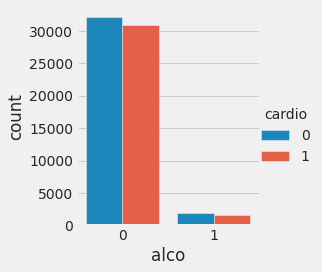

In [176]:
sb.catplot(x = "alco", data = df, kind = "count", height = 4,hue="cardio")

Graph comparing participation in physical activity and presence/absence of cardiovascular disease

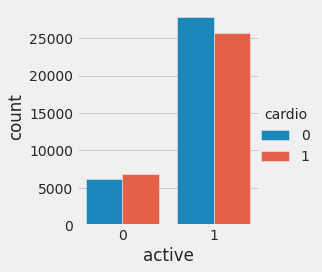

In [177]:
sb.catplot(x = "active", data = df, kind = "count", height = 4,hue ="cardio")

# **Correlation matrix**

(13.5, -0.5)

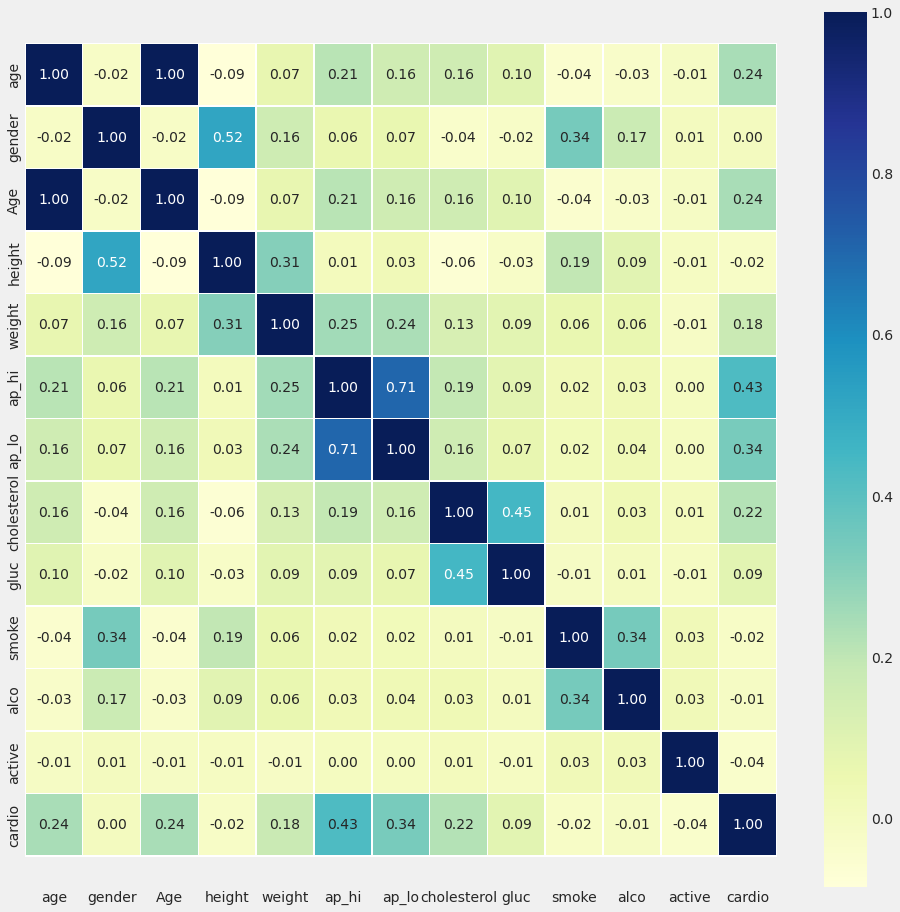

In [178]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sb.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Standardize data

In [179]:
standardScaler = StandardScaler()
scale_columns = [ "ap_lo", "ap_hi","weight","Age","cholesterol"]
scale_columns = standardScaler.fit_transform(df[(scale_columns)])

#   Using machine learning algorithms model  (Random Forest classifier  and logistic regression)** 

# **Logistic regression model**

In [180]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


Split data into train and test data

In [181]:
from sklearn.model_selection import train_test_split

X = scale_columns
y = df.cardio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [182]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 72.28%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.702928      0.749044  0.722768      0.725986      0.725595
recall         0.787672      0.655624  0.722768      0.721648      0.722768
f1-score       0.742891      0.699228  0.722768      0.721059      0.721430
support    25357.000000  24511.000000  0.722768  49868.000000  49868.000000
_______________________________________________
Confusion Matrix: 
 [[19973  5384]
 [ 8441 16070]]

Test Result:
Accuracy Score: 73.12%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.716526     0.750667  0.731156      0.733597      0.733039
recall        0.793079     0.665050  0.731156      0.729065      0.731156
f1-score      0.752862     0.705269  0.731156      0.729066      0.729843
support  

In [183]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,72.276811,73.115563


# ROC CURVE

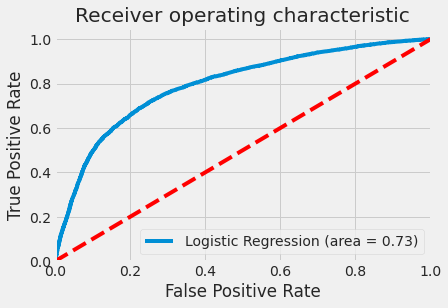

In [184]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest classifier

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 84.85%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.820704      0.883337   0.84848      0.852021      0.851489
recall         0.898253      0.796989   0.84848      0.847621      0.848480
f1-score       0.857729      0.837944   0.84848      0.847837      0.848005
support    25357.000000  24511.000000   0.84848  49868.000000  49868.000000
_______________________________________________
Confusion Matrix: 
 [[22777  2580]
 [ 4976 19535]]

Test Result:
Accuracy Score: 69.84%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.694444     0.703345   0.69843      0.698895      0.698750
recall        0.742747     0.651119   0.69843      0.696933      0.698430
f1-score      0.717784     0.676226   0.69843      0.697005      0.697684
support  

In [186]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,72.276811,73.115563
1,Random Forest Classifier,84.847999,69.842989


#Chapter 3
##The End
###3.1 Summary
####The Beginning
At first we came up with Color Detection, Predicting Credit Card Spend, any many lots of project. Eventually we came back to the offered ones and proceed on choosing Cardiovascular related dataset instead.

####The Middle
During the process, the team has provided necessary exploratory data analysis and visualization needed, using the data science to solve the problem, and learnt something new on how to colaborate with Google Colab as well as adapting to the environment itself.

Don worked on the Data Processing, Data Cleaning and, Data Visualization; Jeremy did some data visualization and built models based on machine learning algorithms ; Sylvia did a bit of Exploratory Data Analysis and some minor things that includes the comment and structural of the notebook.

####The End
We found out that there are 2 variables that have highest correlation with the Cardiovascular diseases. These two are ap_hi and ap_lo.There is also a very strong correlation between ap_hi and ap_lo.We also found out that both the logistic regression model and the random forest classifier models are effective in predicting cardiovascular disease but both can be improved even further to give more accurate train and test results.
